In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [325]:
dat = pd.read_csv('/home/david/Desktop/stock_market_data/IYG_trade_Nov_16.csv')

In [326]:
dat.shape

(12801, 14)

In [327]:
dat.head()

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_STOP_IND,TR_CORR,TR_SEQNUM,TR_ID,TR_SOURCE,TR_RF
0,2016-10-31,8:25:59.248756000,D,IYG,NaN,TI,3,90.2000,N,0,487,NaN,C,T
1,2016-10-31,9:30:00.049698000,P,IYG,NaN,O,2484,90.5000,N,0,1108,NaN,C,NaN
2,2016-10-31,9:30:00.049748000,P,IYG,NaN,Q,2484,90.5000,N,0,1110,NaN,C,NaN
3,2016-10-31,9:32:03.833715000,D,IYG,NaN,I,28,90.3909,N,0,4544,NaN,C,T
4,2016-10-31,9:33:08.273556000,T,IYG,NaN,@,100,90.5600,N,0,5955,NaN,C,NaN


In [328]:
dat.tail()

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_STOP_IND,TR_CORR,TR_SEQNUM,TR_ID,TR_SOURCE,TR_RF
12796,2016-11-16,16:10:00.060992000,P,IYG,NaN,M,119,99.78,N,0,447026,NaN,C,NaN
12797,2016-11-16,18:30:00.005008000,P,IYG,NaN,9,0,99.78,N,0,449333,NaN,C,NaN
12798,2016-11-16,18:30:00.005008000,P,IYG,NaN,M,119,99.78,N,0,449334,NaN,C,NaN
12799,2016-11-16,20:00:00.005702000,P,IYG,NaN,9,0,99.78,N,0,450335,NaN,C,NaN
12800,2016-11-16,20:00:00.005787000,P,IYG,NaN,M,119,99.78,N,0,450336,NaN,C,NaN


In [329]:
subset = dat.copy()

In [330]:
#Asset under review
#subset = subset.loc[subset.SYM_ROOT == 'JPM',:]

In [331]:
#subset = dat

In [332]:
subset.TIME_M = subset.TIME_M.astype('datetime64[ns]') # It claims each time is our current day, but ignore that

In [333]:
subset.tail()

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_STOP_IND,TR_CORR,TR_SEQNUM,TR_ID,TR_SOURCE,TR_RF
12796,2016-11-16,2023-09-17 16:10:00.060992,P,IYG,NaN,M,119,99.78,N,0,447026,NaN,C,NaN
12797,2016-11-16,2023-09-17 18:30:00.005008,P,IYG,NaN,9,0,99.78,N,0,449333,NaN,C,NaN
12798,2016-11-16,2023-09-17 18:30:00.005008,P,IYG,NaN,M,119,99.78,N,0,449334,NaN,C,NaN
12799,2016-11-16,2023-09-17 20:00:00.005702,P,IYG,NaN,9,0,99.78,N,0,450335,NaN,C,NaN
12800,2016-11-16,2023-09-17 20:00:00.005787,P,IYG,NaN,M,119,99.78,N,0,450336,NaN,C,NaN


In [334]:
subset.head()

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_STOP_IND,TR_CORR,TR_SEQNUM,TR_ID,TR_SOURCE,TR_RF
0,2016-10-31,2023-09-17 08:25:59.248756,D,IYG,NaN,TI,3,90.2000,N,0,487,NaN,C,T
1,2016-10-31,2023-09-17 09:30:00.049698,P,IYG,NaN,O,2484,90.5000,N,0,1108,NaN,C,NaN
2,2016-10-31,2023-09-17 09:30:00.049748,P,IYG,NaN,Q,2484,90.5000,N,0,1110,NaN,C,NaN
3,2016-10-31,2023-09-17 09:32:03.833715,D,IYG,NaN,I,28,90.3909,N,0,4544,NaN,C,T
4,2016-10-31,2023-09-17 09:33:08.273556,T,IYG,NaN,@,100,90.5600,N,0,5955,NaN,C,NaN


In [335]:
subset['hour'] = subset.TIME_M.dt.hour
subset['minute'] = subset.TIME_M.dt.minute

In [336]:
#Pick between 9:30 and 4
trading_session = subset.loc[subset.TIME_M >= pd.to_datetime('2023-09-17 9:35:00.000000'),:]
trading_session = trading_session.loc[trading_session.TIME_M <= pd.to_datetime('2023-09-17 16:00:00.000000'),:]

In [337]:
# Now grab only minutes div by 5

In [338]:
trading_session.head()

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_STOP_IND,TR_CORR,TR_SEQNUM,TR_ID,TR_SOURCE,TR_RF,hour,minute
7,2016-10-31,2023-09-17 09:39:05.793165,D,IYG,NaN,@,100,90.6299,N,0,15400,NaN,C,T,9,39
8,2016-10-31,2023-09-17 09:42:54.386268,P,IYG,NaN,@,100,90.4400,N,0,20649,NaN,C,NaN,9,42
9,2016-10-31,2023-09-17 09:42:57.823366,P,IYG,NaN,@,100,90.4100,N,0,20841,NaN,C,NaN,9,42
10,2016-10-31,2023-09-17 09:42:57.824475,B,IYG,NaN,@,100,90.4000,N,0,20842,NaN,C,NaN,9,42
11,2016-10-31,2023-09-17 09:45:10.521968,D,IYG,NaN,I,29,90.4000,N,0,23890,NaN,C,T,9,45


In [339]:
trading_session['mod_5'] = trading_session.TIME_M.dt.minute % 5

In [340]:
trading_session = trading_session.loc[trading_session['mod_5'] == 0]

In [341]:
trading_session.head()

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_STOP_IND,TR_CORR,TR_SEQNUM,TR_ID,TR_SOURCE,TR_RF,hour,minute,mod_5
11,2016-10-31,2023-09-17 09:45:10.521968,D,IYG,NaN,I,29,90.4000,N,0,23890,NaN,C,T,9,45,0
12,2016-10-31,2023-09-17 09:45:42.522417,D,IYG,NaN,@,113,90.4046,N,0,25026,NaN,C,T,9,45,0
19,2016-10-31,2023-09-17 10:20:56.462272,P,IYG,NaN,F,100,90.5400,N,0,67847,NaN,C,NaN,10,20,0
24,2016-10-31,2023-09-17 10:30:01.431331,Z,IYG,NaN,@,400,90.5100,N,0,75391,NaN,C,NaN,10,30,0
25,2016-10-31,2023-09-17 10:30:01.431367,P,IYG,NaN,@,200,90.5100,N,0,75392,NaN,C,NaN,10,30,0


In [342]:
# Remove prices equal to zero
trading_session = trading_session.loc[trading_session['ASK'] != 0]
trading_session = trading_session.loc[trading_session['BID'] != 0]

KeyError: 'ASK'

In [343]:
trading_session.head()

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_STOP_IND,TR_CORR,TR_SEQNUM,TR_ID,TR_SOURCE,TR_RF,hour,minute,mod_5
11,2016-10-31,2023-09-17 09:45:10.521968,D,IYG,NaN,I,29,90.4000,N,0,23890,NaN,C,T,9,45,0
12,2016-10-31,2023-09-17 09:45:42.522417,D,IYG,NaN,@,113,90.4046,N,0,25026,NaN,C,T,9,45,0
19,2016-10-31,2023-09-17 10:20:56.462272,P,IYG,NaN,F,100,90.5400,N,0,67847,NaN,C,NaN,10,20,0
24,2016-10-31,2023-09-17 10:30:01.431331,Z,IYG,NaN,@,400,90.5100,N,0,75391,NaN,C,NaN,10,30,0
25,2016-10-31,2023-09-17 10:30:01.431367,P,IYG,NaN,@,200,90.5100,N,0,75392,NaN,C,NaN,10,30,0


In [344]:
#subset.groupby(['hour','minute']).nth(0)

In [345]:
trading_session.columns

Index(['DATE', 'TIME_M', 'EX', 'SYM_ROOT', 'SYM_SUFFIX', 'TR_SCOND', 'SIZE',
       'PRICE', 'TR_STOP_IND', 'TR_CORR', 'TR_SEQNUM', 'TR_ID', 'TR_SOURCE',
       'TR_RF', 'hour', 'minute', 'mod_5'],
      dtype='object')

In [346]:
gr_by = trading_session.groupby(['DATE','hour','minute']).min('TIME_M')

In [347]:
#gr_by = subset.groupby(['DATE','hour','minute'])['TIME_M'].min()

In [348]:
gr_by.head(n = 50)

SYM_SUFFIX   SIZE    PRICE  TR_CORR  TR_SEQNUM  TR_ID  \
DATE       hour minute                                                          
2016-10-31 9    45             NaN     29  90.4000        0      23890    NaN   
           10   20             NaN    100  90.5400        0      67847    NaN   
                30             NaN    100  90.5000        0      75391    NaN   
                50             NaN     60  90.2500        0      93758    NaN   
           11   0              NaN    100  90.2100        0     102516    NaN   
                20             NaN     11  90.3800        0     116198    NaN   
           12   5              NaN     48  90.5410        0     152793    NaN   
                25             NaN    200  90.5300        0     166437    NaN   
                35             NaN     90  90.5393        0     174965    NaN   
                40             NaN    100  90.4900        0     179200    NaN   
                45             NaN    200  90.4573        0     182553    NaN   
                55             NaN     87  90.5050        0     188740    NaN   
           13   10             NaN  18830  90.4200        0     198809    NaN   
                30             NaN    100  90.3900        0     211652    NaN   
                45             NaN     50  90.4900        0     222332    NaN   
           14   15             NaN      8  90.3499        0     246750    NaN   
                50             NaN     95  90.2000        0     275716    NaN   
           15   5              NaN     46  90.2900        0     289248    NaN   
                10             NaN    136  90.3074        0     294714    NaN   
                25             NaN    100  90.3100        0     307963    NaN   
                35             NaN     25  90.3680        0     318816    NaN   
                45             NaN    143  90.2965        0     333087    NaN   
                55             NaN    100  90.2300        0     353585    NaN   
2016-11-01 10   0              NaN    300  90.2600        0      51895    NaN   
                5              NaN     18  90.2400        0      62219    NaN   
                10             NaN    100  90.2300        0      69704    NaN   
                30             NaN      3  90.1200        0      93631    NaN   
                45             NaN      4  89.8800        0     110228    NaN   
                55             NaN    100  89.9800        0     119850    NaN   
           11   0              NaN    100  90.1500        0     124782    NaN   
                15             NaN     44  90.0000        0     137450    NaN   
                20             NaN     10  90.0586        0     142103    NaN   
                30             NaN    100  89.9500        0     151033    NaN   
                35             NaN    100  90.0600        0     156668    NaN   
                55             NaN    100  89.9800        0     175000    NaN   
           12   0              NaN    100  89.9100        0     181004    NaN   
                10             NaN    100  89.8700        0     190590    NaN   
                20             NaN    100  89.7400        0     204041    NaN   
                50             NaN      3  89.6240        0     240311    NaN   
           13   0              NaN     21  89.7940        0     249188    NaN   
                25             NaN    100  89.7000        0     274186    NaN   
                30             NaN    100  89.6900        0     279380    NaN   
                45             NaN      6  89.2801        0     297566    NaN   
           14   10             NaN      9  89.2605        0     325953    NaN   
                15             NaN    100  89.1700        0     332272    NaN   
                25             NaN    100  89.0800        0     346730    NaN   
                30             NaN      3  89.2925        0     356939    NaN   
                35             NaN    200  89.4000     

In [350]:
if 'PRICE' not in gr_by.columns:
    gr_by['PRICE'] = gr_by['BID']  + .5 * (gr_by['ASK'] - gr_by['BID'])

In [351]:
gr_by.head()

SYM_SUFFIX  SIZE  PRICE  TR_CORR  TR_SEQNUM  TR_ID  \
DATE       hour minute                                                       
2016-10-31 9    45             NaN    29  90.40        0      23890    NaN   
           10   20             NaN   100  90.54        0      67847    NaN   
                30             NaN   100  90.50        0      75391    NaN   
                50             NaN    60  90.25        0      93758    NaN   
           11   0              NaN   100  90.21        0     102516    NaN   

                        mod_5  
DATE       hour minute         
2016-10-31 9    45          0  
           10   20          0  
                30          0  
                50          0  
           11   0           0

In [352]:
gr_by['log_PRICE'] = np.log(gr_by['PRICE'])

In [353]:
gr_by['difflog_PRICE'] = gr_by['log_PRICE'].diff()

In [354]:
gr_by['sq_difflog_PRICE'] = gr_by['difflog_PRICE']**2

In [355]:
gr_by.head()

SYM_SUFFIX  SIZE  PRICE  TR_CORR  TR_SEQNUM  TR_ID  \
DATE       hour minute                                                       
2016-10-31 9    45             NaN    29  90.40        0      23890    NaN   
           10   20             NaN   100  90.54        0      67847    NaN   
                30             NaN   100  90.50        0      75391    NaN   
                50             NaN    60  90.25        0      93758    NaN   
           11   0              NaN   100  90.21        0     102516    NaN   

                        mod_5  log_PRICE  difflog_PRICE  sq_difflog_PRICE  
DATE       hour minute                                                     
2016-10-31 9    45          0   4.504244            NaN               NaN  
           10   20          0   4.505792       0.001547      2.394678e-06  
                30          0   4.505350      -0.000442      1.952679e-07  
                50          0   4.502584      -0.002766      7.652158e-06  
           11   0           0   4.502140      -0.000443      1.965251e-07

In [356]:
gr_by.dropna(subset=['sq_difflog_PRICE'], inplace=True)

In [357]:
gr_by.tail()

SYM_SUFFIX  SIZE    PRICE  TR_CORR  TR_SEQNUM  TR_ID  \
DATE       hour minute                                                         
2016-11-16 15   25             NaN   100  99.9200        0     387544    NaN   
                35             NaN     7  99.7240        0     400585    NaN   
                45             NaN    25  99.6800        0     415118    NaN   
                50             NaN     1  99.6601        0     421857    NaN   
                55             NaN     1  99.6701        0     430100    NaN   

                        mod_5  log_PRICE  difflog_PRICE  sq_difflog_PRICE  
DATE       hour minute                                                     
2016-11-16 15   25          0   4.604370      -0.000334      1.116974e-07  
                35          0   4.602406      -0.001963      3.855315e-06  
                45          0   4.601965      -0.000441      1.947590e-07  
                50          0   4.601765      -0.000200      3.986363e-08  
                55          0   4.601866       0.000100      1.006732e-08

In [358]:
gr_by.groupby(['DATE'])['sq_difflog_PRICE'].sum()

DATE
2016-10-31    0.000028
2016-11-01    0.000075
2016-11-02    0.000110
2016-11-03    0.000038
2016-11-04    0.000054
2016-11-07    0.000518
2016-11-08    0.000122
2016-11-09    0.000712
2016-11-10    0.000976
2016-11-11    0.000068
2016-11-14    0.000399
2016-11-15    0.000171
2016-11-16    0.000088
Name: sq_difflog_PRICE, dtype: float64

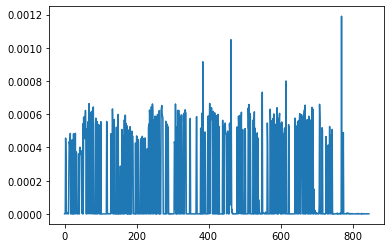

In [324]:
plt.plot(gr_by['sq_difflog_PRICE'].reset_index()['sq_difflog_PRICE'])
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a tuple

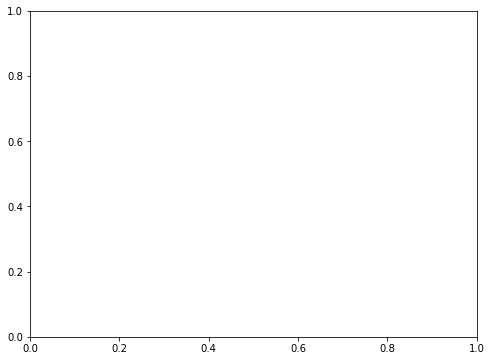

In [282]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(gr_by['sq_difflog_PRICE']);